<br>
<br>
<center> <font size = 6> Implementation of IS-LM model </font> </center>
<br>
<br>
<center> <font size = 3> Last Updated: 18/01-2023 </font> </center>

Society as a whole has an expectation of what they need to use in the upcoming period. Let this be denoted by PE.

$$
PE = C(Y - T) + I + G
$$

In market equilibrium, these expectations are met. Otherwise, it would lead to involuntary increase or decrease in storage. Therefore, it is assumed that actual expenditure $Y$ is the same as $PE$ in equilibrium.

$$
Y = PE
$$

For consumption C and investments I defined by an affine function, we can find the equilibrium $(Y^*, PE^*)$.

\begin{align}
    PE &= \alpha_{C} + \beta_{C} \cdot (Y - T) + \alpha_{I} + \beta_{I} \cdot r + G \\
    Y &= \alpha_{C} + \beta_{C} \cdot (Y - T) + \alpha_{I} + \beta_{I} \cdot r + G \\
    Y (1 - \beta_{C})  &=  \alpha_{C} - \beta_{C} \cdot T + \alpha_{I} + \beta_{I} \cdot r + G \\
    Y^{*} &= \frac{ \alpha_{C} - \beta_{C} \cdot T + \alpha_{I} + \beta_{I} \cdot r + G}{(1 - \beta_{C})}
\end{align}

## Derivation of IS-curve

The functions are defined, and then the Keynesian cross is plotted.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
alpha_C = 0
beta_C = 0.55

alpha_I = 0
beta_I = -2


# Functions
def C(YT, alpha = alpha_C, beta = beta_C):
    
    return(alpha + beta * YT)

def I(r, alpha = alpha_I, beta = beta_I):
    
    return(alpha + beta * r)

# Exogenous variables
G = 20

# Numerical intersection algorithm
def LineIntersection(X, F1, F2, tol = 10**(-1)):
    
    x_star = X[0]
    y_star = F1[0]
    best_diff = abs(F1[0] - F2[0])
    
    for (x, f1, f2) in zip(X, F1, F2):
        
        if abs(f1 - f2) < best_diff:
            x_star = x
            y_star = f1
            best_diff = abs(f1 - f2)
            
    if best_diff > tol:
        # The two functions do most likely not intercept
        return((np.nan, np.nan))  
    else:       
        # print("\nThe equilibrium is (Y, PE) = ({}, {})".format(x_star, y_star))
        return((x_star, y_star))    
        
# Definition of planned expenditures
def PE(Y, T, r):    
    return(C(Y - T) + I(r) + G)


Now we proceed to the IS-curve.

In [125]:
def IS_curve(Y, interest_rates, T = 1):
    
    X_star = np.zeros(len(interest_rates))
    
    # For every interest rate level (r), we have to find the equilibrium.
    for i in range(len(interest_rates)):
        
        x_star, y_star = LineIntersection(Y, Y, PE(Y, T, interest_rates[i]))
        X_star[i] = x_star
        
    return(X_star, interest_rates)

Then we can plot them side by side.

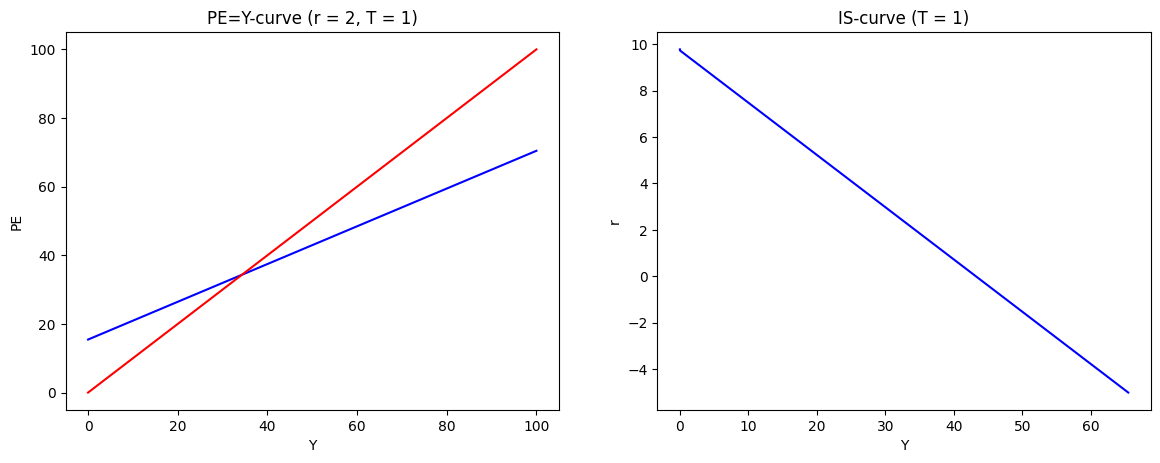

In [130]:
step_size = 0.01
lower = 0
upper = 100
Y = np.arange(lower, upper + step_size, step_size)

used_r = 2
used_taxes = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100);

ax1.plot(Y, PE(Y, used_taxes, 2), color='blue')
ax1.plot(Y, Y, color='red')
ax1.set_title("PE=Y-curve (r = {}, T = {})".format(used_r, used_taxes))
ax1.set_xlabel("Y")
ax1.set_ylabel("PE")

X_IS, r_IS = IS_curve(Y, np.arange(-5, 10, step_size), T = used_taxes)
ax2.plot(X_IS, r_IS, color='blue')
ax2.set_title("IS-curve (T = {})".format(used_taxes))
ax2.set_xlabel("Y")
ax2.set_ylabel("r")

plt.show()

## Derivation of LM-curve

We define the demand for liquidity $L^{d}$ and supply of liquidity $L^{s}$.

In [53]:
def L_d(M, P, Y):
    
    r = (M/P)**(-1/4) + Y
    return(r)

def L_s(M, P, r_range=(1,2)):
    
    r = np.linspace(r_range[0], r_range[1], num=100)
    MP = np.ones(len(r)) * (M/P)
    return((MP, r))

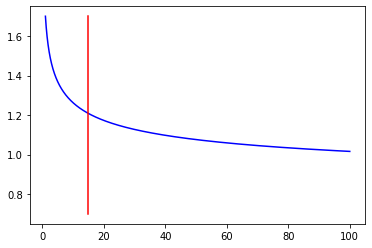

In [57]:
step_size = 0.01
lower = 1
upper = 100
M = np.arange(lower, upper + step_size, step_size)
P = 1
Y = 0.7

plt.plot(M, L_d(MP, 1, Y), color = 'blue')
plt.plot(L_s(15, P, r_range=(1,2))[0], L_s(15, P, r_range=(Y,max(L_d(MP, 1, Y))))[1], color = 'red')
plt.show()

In [ ]:
def LM_curve(Y, interest_rates, T = 1):
    
    X_star = np.zeros(len(interest_rates))
    
    # For every interest rate level (r), we have to find the equilibrium.
    for i in range(len(interest_rates)):
        
        x_star, y_star = LineIntersection(Y, Y, PE(Y, T, interest_rates[i]))
        X_star[i] = x_star
        
    return(X_star, interest_rates)

## Price Elasticity

## Supply and Demand

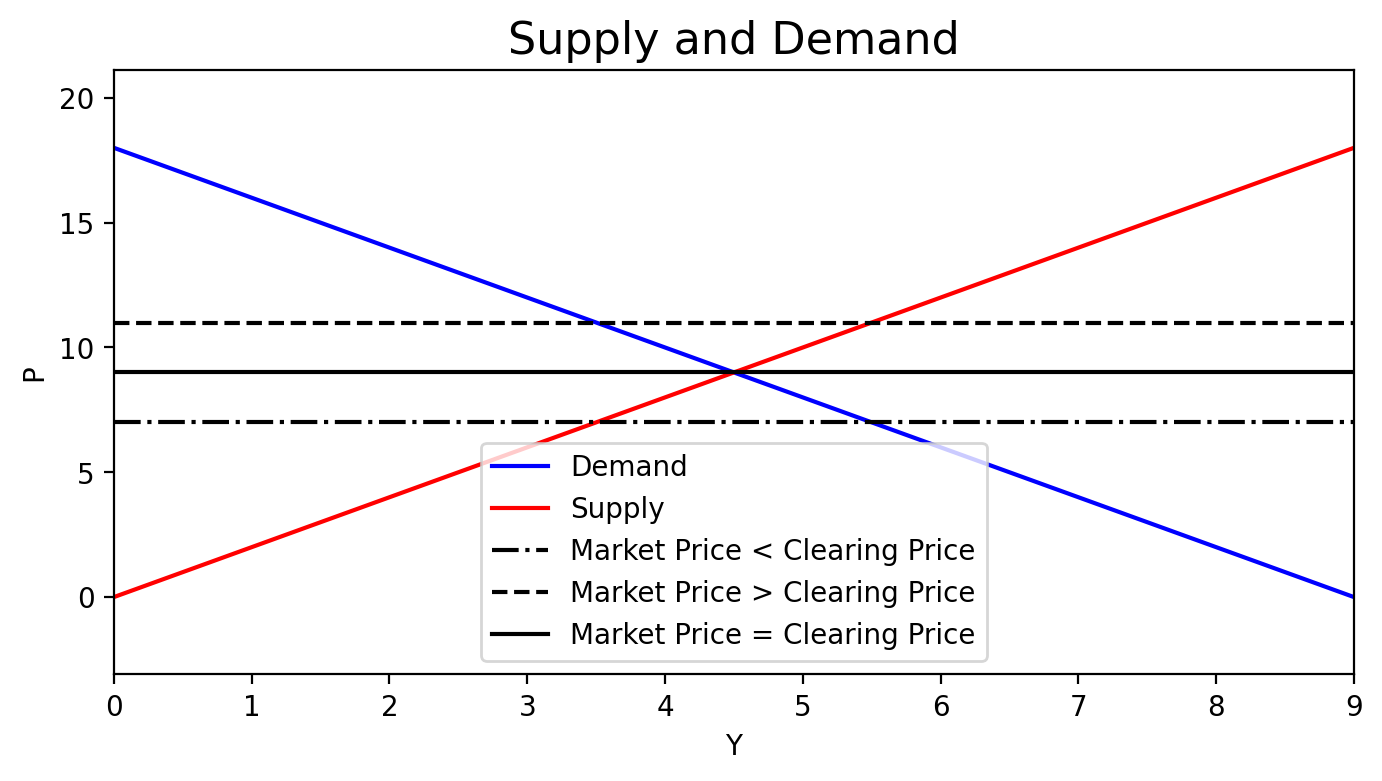

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
alpha_C = 0
beta_C = 0.55

alpha_I = 0
beta_I = -2

alpha_S = 0
beta_S = 2

alpha_D = 20
beta_D = -2

# Definition of planned expenditures
def Demand_Y(Y, r = 1):   
    T = 1
    G = 1
    sigma = 1
    return((alpha_D + G - T - sigma * r) + beta_D * Y)

def Supply_Y(Y):
    return(alpha_S + beta_S * Y)

def Demand_P(Y, T, r):    
    return(C(Y - T) + I(r) + G)

def Supply_P(Y):
    return((Y - alpha_S)/beta_S)

step_size = 0.01
lower = 0
upper = 10
Y = np.arange(lower, upper + step_size, step_size)
DEMAND = Demand_Y(Y, r)
SUPPLY = Supply_Y(Y)

plt.figure(figsize=(8,4), dpi=200)
plt.plot(Y, DEMAND, color = 'blue', label = "Demand")
plt.plot(Y, SUPPLY, color = 'red', label = "Supply")
plt.plot(Y, np.ones(len(Y))*7, color = 'black', linestyle='dashdot', label = "Market Price < Clearing Price")
plt.plot(Y, np.ones(len(Y))*11, color = 'black', linestyle='dashed', label = "Market Price > Clearing Price")
plt.plot(Y, np.ones(len(Y))*9, color = 'black', linestyle='-', label = "Market Price = Clearing Price")
plt.xlabel("Y")
plt.ylabel("P")
plt.xlim([0, Y[np.argmin(np.abs(DEMAND))]])
plt.title("Supply and Demand", fontsize = 16)
plt.legend()
plt.savefig("SupplyDemand", dpi='figure', format=None, metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto')
plt.show()


In [86]:
LineIntersection(Y, DEMAND, SUPPLY)

(4.5, 9.0)